# Introduction to Plotting

In this tutorial, you will be walked through making scatterplots. You will be using the data files from the last session (002_DataTypes).

These plots are simple to generate in Python and can be easily customised.

__Notes__:

If you haven't already installed openpyxl, looking the 002_DataTypes.pdf file for instructions.

1) 'fig' = the figure/plot object. Can be thought of as a page in a book.
2) 'ax1' = an axis object. Defines a single plot within a 'fig'.
3) 'plt' = the toolbox you use to draw things on the page.

*Last edited: Isabella Casini, Justin Chitpin, Haxby Hefford  27.05.2025*

In [9]:
# import relevant packages (entire line is commented out)

import pandas as pd # call pandas "pd" for short (midline comment)
import numpy as np # call numpy "np" for short  
import matplotlib.pyplot as plt # import pyplot from matplotlib and call it "plt"

## Import and examine the data files

*Not sure how to do this, look at lesson 002_DataTypes.*

In [2]:
# Reading in an excel file (make sure to use the correct path)
pathxls = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop\002_Sample_Data\fake_gdcw_growth_data_pivoted.xlsx"

df = pd.read_excel(pathxls, sheet_name='Growth_Data', header=0, index_col=0) # can select sheet name
print(df)

        Strain_A-Rep1  Strain_A-Rep2  Strain_A-Rep3  Strain_B-Rep1  \
Time_h                                                               
0               0.052         -0.068         -0.030          0.039   
1               0.060         -0.020          0.085          0.096   
2               0.190          0.129          0.127          0.123   
3               0.431          0.304          0.340          0.212   
4               0.711          0.738          0.693          0.381   
5               1.238          1.205          1.343          0.590   
6               1.856          1.707          1.777          0.964   
7               2.184          2.219          2.092          1.313   
8               2.319          2.331          2.384          1.657   
9               2.461          2.437          2.372          1.799   
10              2.449          2.401          2.483          1.797   
11              2.465          2.462          2.391          1.958   
12              2.50

## Find the averages (arithmetric mean) and standard deviations by strain

*Hint: Create new columns for each strain.*

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

In [3]:
df['A_Avg'] = df[['Strain_A-Rep1', 'Strain_A-Rep2', 'Strain_A-Rep3']].mean(axis=1)  # Calculate average for A
df['A_Std'] = df[['Strain_A-Rep1', 'Strain_A-Rep2', 'Strain_A-Rep3']].std(axis=1)  # Calculate standard deviation for A

df['B_Avg'] = df[['Strain_B-Rep1', 'Strain_B-Rep2', 'Strain_B-Rep3']].mean(axis=1)  # Calculate average for B
df['B_Std'] = df[['Strain_B-Rep1', 'Strain_B-Rep2', 'Strain_B-Rep3']].std(axis=1)  # Calculate standard deviation for B

## Plot the averages for each strain as scatter plot

### Play with the markers, lines, colours, and labels.

*Line styles: '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'*

*Markers: https://matplotlib.org/stable/api/markers_api.html*

*Colours: try the Google colour picker (just Google "colour picker"). You can even use HEX and RGB colour codes*
*https://matplotlib.org/stable/users/explain/colors/colors.html*

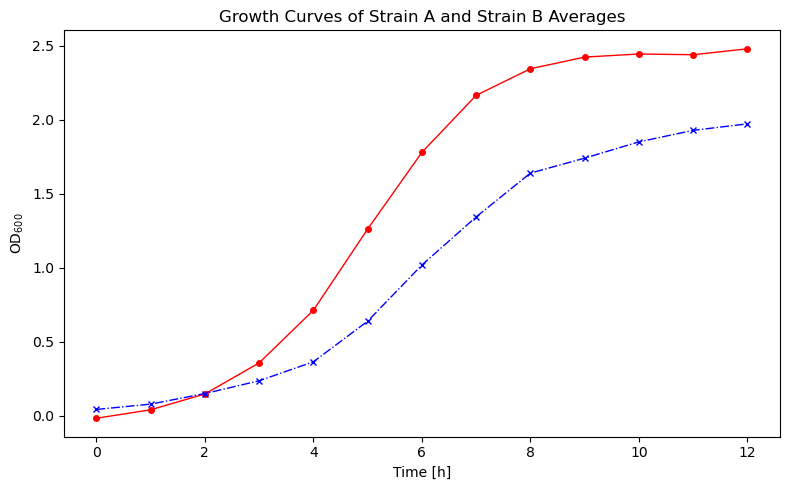

In [4]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5)) # inches

# Plot Strain A (OD600)
ax1.plot(df.index, df["A_Avg"], color="red", label="Strain A", marker = 'o', markersize = 4, linewidth=1,linestyle='-')

# Plot Strain B (OD600)
ax1.plot(df.index, df["B_Avg"], color="blue", label="Strain B", marker = 'x', markersize = 4, linewidth=1, linestyle='-.')

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$", color="black") # This format, s$_{}$, is for the subscripted 600

# ax1.set_ylabel("$\mu$", color="black") # This format, s$_{}$, is for the subscripted 600
# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages")

# Cleans up the layout
fig.tight_layout()

# Shows the plot
plt.show()

## Add in error bars using the STD and a legend

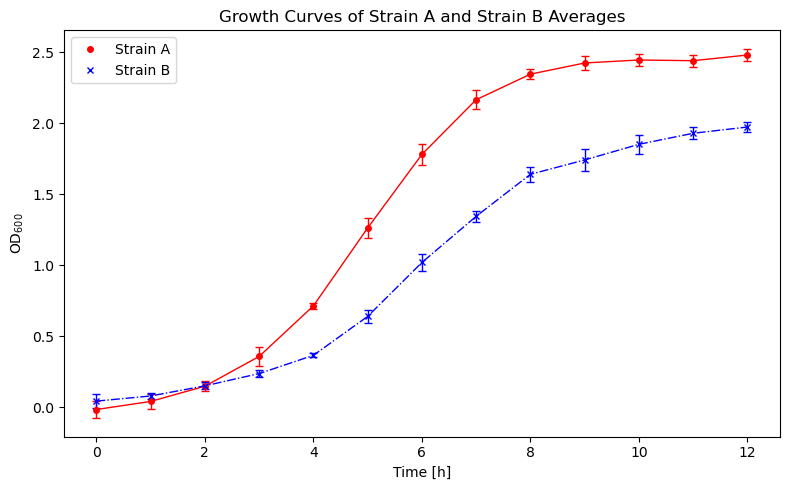

In [5]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

#-----------------------------------------------------------------------------------
# New Part: Adding Error Bars to the Growth Curves
# Plot Strain A (OD600) with error bars
ax1.errorbar(df.index, df["A_Avg"], yerr=df["A_Std"], 
             color="red", label="Strain A", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

# Plot Strain B (OD600) with error bars
ax1.errorbar(df.index, df["B_Avg"], yerr=df["B_Std"], 
             color="blue", label="Strain B", marker='x', markersize=4, 
             linewidth=1, linestyle='-.', capsize=3)

# Add legend
# ax1.legend()
#-----------------------------------------------------------------------------------
# Remove errorbar handles from the legend by plotting invisible points for legend only
handles, labels = ax1.get_legend_handles_labels()
ax1.legend([plt.Line2D([0], [0], color="red", marker='o', linestyle='', linewidth=1, markersize=4),
            plt.Line2D([0], [0], color="blue", marker='x', linestyle='', linewidth=1, markersize=4)],
           ["Strain A", "Strain B"])

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$", color="black")

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages")

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()


## Change the y-axis to be log-scale and add a vertical line

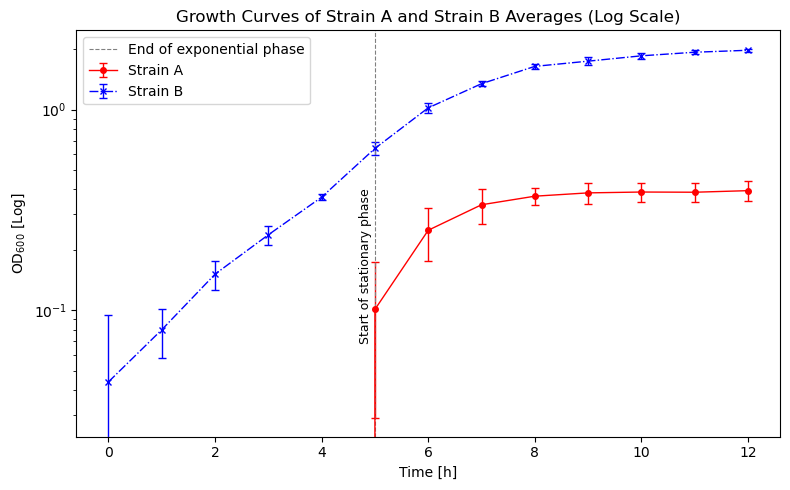

In [12]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

# Plot Strain A (OD600) with error bars
ax1.errorbar(df.index, np.log10(df["A_Avg"]), yerr=df["A_Std"], 
             color="red", label="Strain A", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

# Plot Strain B (OD600) with error bars
ax1.errorbar(df.index, df["B_Avg"], yerr=df["B_Std"], 
             color="blue", label="Strain B", marker='x', markersize=4, 
             linewidth=1, linestyle='-.', capsize=3)

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$ [Log]", color="black")

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages (Log Scale)")

# ----------------------------------------------------------------------------------
# New Part

# Set log scale on y-axis
ax1.set_yscale('log')

# add vertical line at the end of the exponential phase
ax1.axvline(x=5, color='gray', linestyle='--', linewidth=0.8, label='End of exponential phase') # label in the legend

# Add text annotation for the vertical line
ax1.text(5-0.3, 0.07, 'Start of stationary phase', color='black', fontsize=9, rotation=90, ha='left')  # label on the graph

# Add legend
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.5) # play with these values (they are optional)
#-----------------------------------------------------------------------------------

# Clean up the layout
fig.tight_layout()

# Show the plot (collects everything you've prepared and pops it on screen.)
plt.show()

## Axes adjustments

In [13]:
# import additional packages for formatting the axes
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

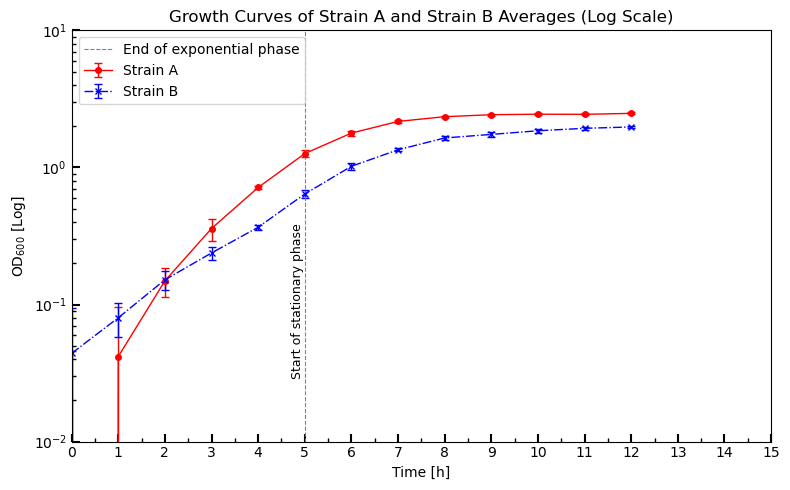

In [14]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

# Plot Strain A (OD600) with error bars
ax1.errorbar(df.index, df["A_Avg"], yerr=df["A_Std"], 
             color="red", label="Strain A", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

# Plot Strain B (OD600) with error bars
ax1.errorbar(df.index, df["B_Avg"], yerr=df["B_Std"], 
             color="blue", label="Strain B", marker='x', markersize=4, 
             linewidth=1, linestyle='-.', capsize=3)

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$ [Log]", color="black")

# Set log scale on y-axis
ax1.set_yscale('log')

# add vertical line at the end of the exponential phase
ax1.axvline(x=5, color='gray', linestyle='--', linewidth=0.8, label='End of exponential phase') # label in the legend

# Add text annotation for the vertical line
ax1.text(5-0.3, 0.03, 'Start of stationary phase', color='black', fontsize=9, rotation=90, ha='left')  # label on the graph

# -------------------------------------------------------------------------------
# New Part

# Set y-axis limits
ax1.set_ylim(0.01, 10)  # Set y-axis limits for better visibility
# Set x-axis limits
ax1.set_xlim(0, 15)  # Set x-axis limits for better visibility

# Specify the x-axis major and minor ticks
ax1.xaxis.set_major_locator(MaxNLocator(nbins=15))  # Adjust the number of ticks on the x-axis
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor ticks every 0.5 unit

# change tick parameters
ax1.tick_params(which='major', direction='in', length=6, width=1.5, colors='k')
ax1.tick_params(which='minor', direction='in', length=3, width=1, colors='k')
# -------------------------------------------------------------------------------

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages (Log Scale)")

# Add legend
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.5) # play with these values (they are optional)

# Clean up the layout
fig.tight_layout()

# Show the plot (collects everything you've prepared and pops it on screen.)
plt.show()
